**目錄**

*   Models, functions and outputs
*   Define model functions
*   Example usage



**備註**

*   Choose GPU to run the code.
*   Remember to upload speaker.mp3!!!!! (As written in doc)
*   Modify INPUT. You need to apply your access token and copy here! Access from https://huggingface.co/settings/tokens
*   會出現版本問題問你要不要重新啟動執行階段，請按"取消"
*   出現提示，請允許一次下載多個檔案

### Models, functions and outputs



*   Text-Generation: 標題 > 內容分段，story_info
  -   meta-llama/Llama-2-7b: https://huggingface.co/meta-llama/Llama-2-7b
  -   llama2 on colab: https://github.com/MuhammadMoinFaisal/LargeLanguageModelsProjects/blob/main/Run%20Llama2%20Google%20Colab/Llama_2_updated.ipynb

*   Text-to-Image: 內容分段  > 每段一張圖片，story_images
  *   stabilityai/stable-diffusion-xl-base-1.0: https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

*   Translation: 內容分段  > 不同語言版本，story_translation
  *   googletrans
  *   翻譯可用語言: {'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'latin', 'lv': 'latvian', 'lt': 'lithuanian', 'lb': 'luxembourgish', 'mk': 'macedonian', 'mg': 'malagasy', 'ms': 'malay', 'ml': 'malayalam', 'mt': 'maltese', 'mi': 'maori', 'mr': 'marathi', 'mn': 'mongolian', 'my': 'myanmar (burmese)', 'ne': 'nepali', 'no': 'norwegian', 'or': 'odia', 'ps': 'pashto', 'fa': 'persian', 'pl': 'polish', 'pt': 'portuguese', 'pa': 'punjabi', 'ro': 'romanian', 'ru': 'russian', 'sm': 'samoan', 'gd': 'scots gaelic', 'sr': 'serbian', 'st': 'sesotho', 'sn': 'shona', 'sd': 'sindhi', 'si': 'sinhala', 'sk': 'slovak', 'sl': 'slovenian', 'so': 'somali', 'es': 'spanish', 'su': 'sundanese', 'sw': 'swahili', 'sv': 'swedish', 'tg': 'tajik', 'ta': 'tamil', 'te': 'telugu', 'th': 'thai', 'tr': 'turkish', 'uk': 'ukrainian', 'ur': 'urdu', 'ug': 'uyghur', 'uz': 'uzbek', 'vi': 'vietnamese', 'cy': 'welsh', 'xh': 'xhosa', 'yi': 'yiddish', 'yo': 'yoruba', 'zu': 'zulu'}

*   Text-to-Speech: 翻譯後的內容分段  > 文字轉語音，story_speeches
  *   coqui/XTTS-v2: https://huggingface.co/coqui/XTTS-v2
  *   語音可用語言: ['en', 'es', 'fr', 'de', 'it', 'pt', 'pl', 'tr', 'ru', 'nl', 'cs', 'ar', 'zh-cn', 'hu', 'ko', 'ja', 'hi']


### Define model functions

In [1]:
"""Text-Generation: 標題 > 內容分段，story_info"""

def text_generation(title):
  split_words = ['paragraph 1:', 'illustration 1:', 'paragraph 2:', 'illustration 2:', 'paragraph 3:', 'illustration 3:', 'paragraph 4:', 'illustration 4:']

  # Step 1: Install All the Required Packages
  # GPU llama-cpp-python
  !CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
  !pip install huggingface_hub
  !pip install llama-cpp-python==0.1.78
  !pip install numpy==1.23.4

  model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
  model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

  # Step 2: Import All the Required Libraries
  from huggingface_hub import hf_hub_download
  from llama_cpp import Llama

  # Step 3: Download the Model
  model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)
  print(model_path)

  # Step 4: Loading the Model (GPU required)
  lcpp_llm = None
  lcpp_llm = Llama(
      model_path=model_path,
      n_threads=2, # CPU cores
      n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
      n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
      )
  lcpp_llm.params.n_gpu_layers # See the number of layers in GPU

  prompt = f'''
  Taking Andersen's story as an example, write a 'very short' picture book story. It should includes four paragraphs (no more than 30 words) and illustration description in each paragraph.
  Title: {title}.
  Format please follows:
    Title:
    Paragraph 1:
    Illustration 1:
    Paragraph 2:
    Illustration 2:
    Paragraph 3:
    Illustration 3:
    Paragraph 4:
    Illustration 4:
  '''

  while True:
    print('RUN THE MODEL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    # Step 6: Generating the Response
    response = lcpp_llm(prompt=prompt, max_tokens=1200, temperature=0.5, top_p=0.95,
                      repeat_penalty=1.2, top_k=150,
                      echo=True)

    full_story = response["choices"][0]["text"]

    # Check if full_story contains all split_words twice
    if all(full_story.lower().count(word.lower()) == 2 for word in split_words):
        return full_story

def extract_story_info(text):
  import re
  split_words = ['paragraph 1:', 'illustration 1:', 'paragraph 2:', 'illustration 2:', 'paragraph 3:', 'illustration 3:', 'paragraph 4:', 'illustration 4:']
  keys = ['paragraph 1', 'illustration 1', 'paragraph 2', 'illustration 2', 'paragraph 3', 'illustration 3', 'paragraph 4', 'illustration 4']

  # Split text into required paragrapgs and illustrations
  pattern = '|'.join(map(re.escape, split_words)) # Construct a regular expression (正則表達式) pattern to match multiple keywords and ignore case (大小寫)
  pattern = f'(?i)({pattern})'
  split_text = re.split(pattern, text) # Split using regular expressions
  split_text = [chunk.strip() for chunk in split_text if chunk.strip()] # Remove empty strings

  # Build dictionary
  story_info = {}
  for i in range(len(keys)):
      key = keys[i]
      value = split_text[i * 2 + 11] # 有...就要用18
      story_info[key] = value

  # Delete some ending sentence like 'I hope this helps you to write a delightful story for young readers!' in the end
  if '\n' in story_info['illustration 4']:
    split_illustration = story_info['illustration 4'].split('\n')
    story_info['illustration 4'] = '\n'.join(split_illustration[:-1])

  return story_info

def translate_to_eng(title):
  !pip install googletrans==4.0.0rc1
  from googletrans import Translator, LANGUAGES

  # Generate translation
  translator = Translator()
  translation = translator.translate(title, dest='en')
  return translation.text

def generate_story(title):
  title = translate_to_eng(title)
  full_story = text_generation(title)
  story_info = extract_story_info(full_story)
  story_info['title'] = title
  return story_info


In [2]:
"""Text-to-Image: 內容分段 > 每段一張圖片，story_images"""

def text_to_image(content):
  !pip install diffusers --upgrade
  from diffusers import DiffusionPipeline
  import torch

  pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
  pipe.to("cuda")

  prompt = f'''
  Style: Joan Cornellà.
  Content: {content}
  '''
  image = pipe(prompt=prompt).images[0]
  return image

def text_to_images(story_info, user_access_token): # Run through model api (faster)
  import requests

  API_URL = "https://api-inference.huggingface.co/models/stabilityai/stable-diffusion-xl-base-1.0"
  headers = {"Authorization": f"Bearer {user_access_token}"} # Access token: https://huggingface.co/settings/tokens

  def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.content

  illustration_keys = ['illustration 1', 'illustration 2', 'illustration 3', 'illustration 4']
  images = []
  for illustration_key in illustration_keys:
    content = story_info[illustration_key]
    prompt = f'''
    Style: Joan Cornellà.
    Content: {content}
    '''
    image_bytes = query({
      "inputs": prompt,
    })
    # You can access the image with PIL.Image for example
    import io
    from PIL import Image
    image = Image.open(io.BytesIO(image_bytes))
    images.append(image)

  return images

def show_image(image):
  import matplotlib.pyplot as plt

  plt.imshow(image)
  plt.axis('off')
  plt.show()


In [3]:
"""Translation: 內容分段 > 不同語言版本，story_translation"""

def text_translation(text, lang):
  !pip install googletrans==4.0.0rc1
  from googletrans import Translator, LANGUAGES

  # Generate translation
  translator = Translator()
  translation = translator.translate(text, dest=lang)
  return translation.text

def text_translations(story_info, lang):
  !pip install googletrans==4.0.0rc1
  from googletrans import Translator, LANGUAGES

  paragraph_keys = ['paragraph 1', 'paragraph 2', 'paragraph 3', 'paragraph 4']
  translations = []
  for paragraph_key in paragraph_keys:
      text = story_info[paragraph_key]

      # Generate translation
      translator = Translator()
      translation = translator.translate(text, dest=lang)
      translations.append(translation.text)

  return translations


In [4]:
"""Text-to-Speech: 翻譯後的內容分段 > 文字轉語音，story_speeches"""

def text_to_speech(text, lang):
  !pip install TTS
  from TTS.api import TTS
  tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

  # Generate speech by cloning a voice using default settings
  tts.tts_to_file(text=text,
          file_path="output.wav",
          speaker_wav="speaker.mp3",
          language=lang)

def text_to_speeches(story_translations, lang):
  !pip install TTS
  from TTS.api import TTS
  tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True)

  # Generate speech by cloning a voice using default settings
  paragraph_keys = ['paragraph 1', 'paragraph 2', 'paragraph 3', 'paragraph 4']
  speeches = []
  for i in range(4):
    text = story_translations[i]
    speech_file_path = f"{paragraph_keys[i]}.mp3"
    tts.tts_to_file(text=text,
            file_path=speech_file_path,
            speaker_wav="speaker.mp3",
            language=lang)
    speeches.append(speech_file_path)

  return speeches


### Example usage
*   Input:
  *   title
  *   lang
  *   user_access_token (因為 Text-to-Image 模型是用 serverless API 去跑所以需要)
  
  
*   Desired output:
  *   story_images
  *   story_speeches
  *   story_translations


In [5]:
"""Input"""

title = '我變成一隻噴火龍'
lang = 'es'
user_access_token = '' # Get your access token here: https://huggingface.co/settings/tokens


In [6]:
"""Text-Generation: 標題 > 內容分段，story_info"""

story_info = generate_story(title)

# Show results
for key, value in story_info.items():
    print(f"{key}: {value}")
    print("=================================")
print(f'story_info = {story_info}')


Defaulting to user installation because normal site-packages is not writeable
Using pip 22.0.2 from /usr/lib/python3/dist-packages/pip (python 3.10)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ...   Running command pip subprocess to install build dependencies
    Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
    Using cached scikit_build-0.17.6-py3-none-any.whl (84 kB)
    Using cached cmake-3.29.3-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
    Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
    Using cached distro-1.9.0-py3-none-any.whl (20 kB)
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Using cached packaging-24.0-py3-none-any.whl (53 kB)
    Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
done
  Getting requirements to build wheel ...   R

/home/webapp/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/webapp/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin
RUN THE MODEL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


llama.cpp: loading model from /home/webapp/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin
llama_model_load_internal: format     = ggjt v3 (latest)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 512
llama_model_load_internal: n_embd     = 5120
llama_model_load_internal: n_mult     = 256
llama_model_load_internal: n_head     = 40
llama_model_load_internal: n_head_kv  = 40
llama_model_load_internal: n_layer    = 40
llama_model_load_internal: n_rot      = 128
llama_model_load_internal: n_gqa      = 1
llama_model_load_internal: rnorm_eps  = 5.0e-06
llama_model_load_internal: n_ff       = 13824
llama_model_load_internal: freq_base  = 10000.0
llama_model_load_internal: freq_scale = 1
llama_model_load_internal: ftype      = 9 (mostly Q5_1)
llama_model_load_internal: model size = 13B
llama_model_load_internal: ggml ctx size =    0.11 MB
llama_model_load_inte

RUN THE MODEL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



llama_print_timings:        load time = 28138.90 ms
llama_print_timings:      sample time =   116.96 ms /   384 runs   (    0.30 ms per token,  3283.17 tokens per second)
llama_print_timings: prompt eval time = 28138.87 ms /   128 tokens (  219.83 ms per token,     4.55 tokens per second)
llama_print_timings:        eval time = 151097.57 ms /   383 runs   (  394.51 ms per token,     2.53 tokens per second)
llama_print_timings:       total time = 179757.93 ms
Llama.generate: prefix-match hit


RUN THE MODEL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



llama_print_timings:        load time = 28138.90 ms
llama_print_timings:      sample time =   116.79 ms /   384 runs   (    0.30 ms per token,  3288.04 tokens per second)
llama_print_timings: prompt eval time =     0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time = 152920.29 ms /   384 runs   (  398.23 ms per token,     2.51 tokens per second)
llama_print_timings:       total time = 153441.19 ms
Llama.generate: prefix-match hit


RUN THE MODEL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



llama_print_timings:        load time = 28138.90 ms
llama_print_timings:      sample time =   117.00 ms /   384 runs   (    0.30 ms per token,  3282.16 tokens per second)
llama_print_timings: prompt eval time =     0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time = 152046.99 ms /   384 runs   (  395.96 ms per token,     2.53 tokens per second)
llama_print_timings:       total time = 152577.21 ms
Llama.generate: prefix-match hit


paragraph 1: I was an ordinary boy, but one day I found a strange object in the forest. It was a toad's leg bone and it glowed with magic!
illustration 1: A young boy holding a glowing toad's leg bone, standing in front of a giant tree. The background is filled with colorful leaves and flowers.
paragraph 2: When I touched the bone, I felt strange powers coursing through my body. Suddenly, I grew scales, wings, and a fiery breath!
illustration 2: A boy transformed into a dragon, standing on his hind legs with wings spread wide. He is surrounded by flames and smoke.
paragraph 3: Now I can breathe fire and fly through the skies! People call me the Spit Dragon because of my fiery breath. But sometimes I miss being a human boy.
illustration 3: A dragon flying over a village, with people looking up in amazement. The dragon has a sad expression on his face, longing for his former life as a human.
paragraph 4: One day, I will find a way to turn back into a boy. Until then, I'll soar the skies 


llama_print_timings:        load time = 28138.90 ms
llama_print_timings:      sample time =   109.69 ms /   362 runs   (    0.30 ms per token,  3300.30 tokens per second)
llama_print_timings: prompt eval time =     0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time = 143995.62 ms /   362 runs   (  397.78 ms per token,     2.51 tokens per second)
llama_print_timings:       total time = 144489.27 ms


illustration 1: A young boy holding a glowing toad's leg bone, standing in front of a giant tree. The background is filled with colorful leaves and flowers.


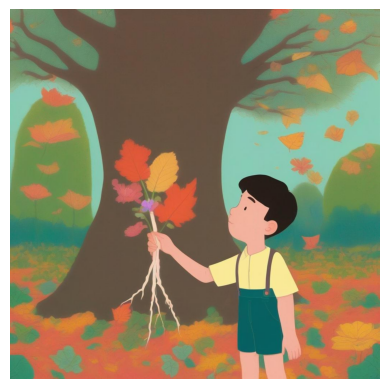

illustration 2: A boy transformed into a dragon, standing on his hind legs with wings spread wide. He is surrounded by flames and smoke.


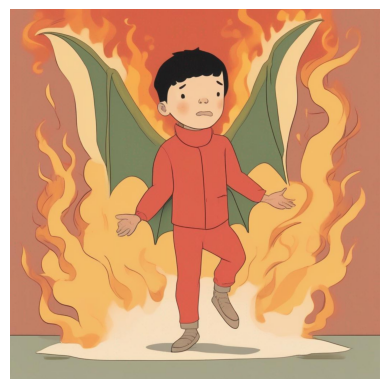

illustration 3: A dragon flying over a village, with people looking up in amazement. The dragon has a sad expression on his face, longing for his former life as a human.


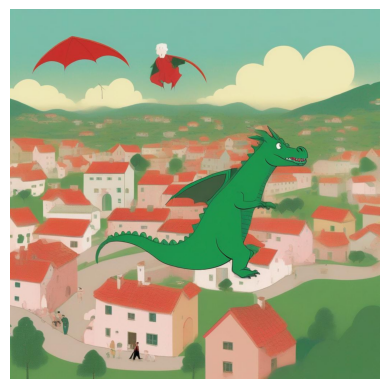

illustration 4: A dragon perched on a branch of a tree, looking out over the landscape with a determined expression. The sun is setting in the background, casting warm colors across the scene.


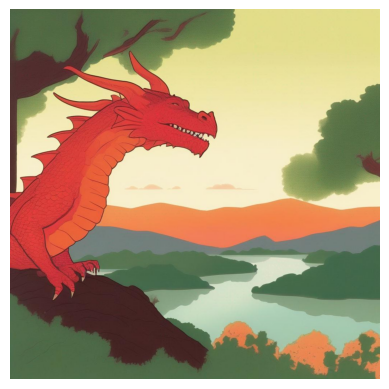

Image 1 saved as: saved_images/illustration_1.jpg
Image 2 saved as: saved_images/illustration_2.jpg
Image 3 saved as: saved_images/illustration_3.jpg
Image 4 saved as: saved_images/illustration_4.jpg
story_images = [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x73F5C39FBB20>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x73F5874DC850>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x73F5874DCDF0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x73F5C09A7670>]


In [10]:
"""Text-to-Image: 內容分段 > 每段一張圖片，story_images"""

story_images = text_to_images(story_info, user_access_token)

# Show results
illustration_keys = ['illustration 1', 'illustration 2', 'illustration 3', 'illustration 4']
for i in range(len(illustration_keys)):
    illustration_key = illustration_keys[i]
    print(f"{illustration_key}: {story_info[illustration_key]}")
    show_image(story_images[i])


def save_images(images, output_dir):
    import os

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, image in enumerate(images):
        image_filename = os.path.join(output_dir, f"illustration_{i+1}.jpg")
        image.save(image_filename)
        print(f"Image {i+1} saved as: {image_filename}")

output_dir = "saved_images"
save_images(story_images, output_dir)
print(f'story_images = {story_images}')


In [11]:
"""Translation: 內容分段 > 不同語言版本，story_translation"""

import locale
locale.getpreferredencoding = lambda: 'UTF-8'
story_translations = text_translations(story_info, lang)

# Show results
print(f'story_translations = {story_translations}')


Defaulting to user installation because normal site-packages is not writeable
story_translations = ['Yo era un niño ordinario, pero un día encontré un objeto extraño en el bosque.¡Era el hueso de la pierna de un sapo y brillaba de magia!', 'Cuando toqué el hueso, sentí poderes extraños que atravesaba mi cuerpo.¡De repente, cultivé escamas, alas y un aliento ardiente!', '¡Ahora puedo respirar fuego y volar por los cielos!La gente me llama Spit Dragon debido a mi aliento ardiente.Pero a veces extraño ser un niño humano.', 'Un día, encontraré una manera de convertirme en un niño.¡Hasta entonces, elevaré los cielos y protegeré mi hogar de bosque con mi aliento ardiente!']


In [12]:
"""Text-to-Speech: 翻譯後的內容分段 > 文字轉語音，story_speeches"""

story_speeches = text_to_speeches(story_translations, lang)

# Download results
import shutil
def download_speech_files(story_speeches, output_dir):
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for speech_file in story_speeches:
        shutil.copy(speech_file, output_dir)
        print(f"Speech file '{speech_file}' downloaded to: {output_dir}")

output_dir = "downloaded_speeches"
download_speech_files(story_speeches, output_dir)
print(f'story_speeches = {story_speeches}')


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 938.0/938.0 KB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 17.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/home/webapp/.local/lib/python3.10/site-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


 > You must confirm the following:
 | > "I have purchased a commercial license from Coqui: licensing@coqui.ai"
 | > "Otherwise, I agree to the terms of the non-commercial CPML: https://coqui.ai/cpml" - [y/n]
 > Downloading model to /home/webapp/.local/share/tts/tts_models--multilingual--multi-dataset--xtts_v2


100%|██████████| 1.87G/1.87G [00:46<00:00, 39.8MiB/s]
100%|██████████| 4.37k/4.37k [00:00<00:00, 6.15kiB/s]
100%|██████████| 361k/361k [00:00<00:00, 386kiB/s] 
100%|██████████| 32.0/32.0 [00:01<00:00, 29.0iB/s]
 92%|█████████▏| 7.15M/7.75M [00:00<00:00, 21.3MiB/s]The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


 > Model's license - CPML
 > Check https://coqui.ai/cpml.txt for more info.


0it [00:00, ?it/s]


 > Using model: xtts
 > Text splitted to sentences.
['Yo era un niño ordinario, pero un día encontré un objeto extraño en el bosque.', '¡Era el hueso de la pierna de un sapo y brillaba de magia!']


/home/webapp/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


 > Processing time: 1.6538679599761963
 > Real-time factor: 0.15600525546490043
 > Text splitted to sentences.
['Cuando toqué el hueso, sentí poderes extraños que atravesaba mi cuerpo.', '¡De repente, cultivé escamas, alas y un aliento ardiente!']
 > Processing time: 1.431091070175171
 > Real-time factor: 0.11034029210502168
 > Text splitted to sentences.
['¡Ahora puedo respirar fuego y volar por los cielos!', 'La gente me llama Spit Dragon debido a mi aliento ardiente.', 'Pero a veces extraño ser un niño humano.']


/home/webapp/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


 > Processing time: 1.4031822681427002
 > Real-time factor: 0.10906099843687095
 > Text splitted to sentences.
['Un día, encontraré una manera de convertirme en un niño.', '¡Hasta entonces, elevaré los cielos y protegeré mi hogar de bosque con mi aliento ardiente!']
 > Processing time: 1.1324551105499268
 > Real-time factor: 0.11158763758234076
Speech file 'paragraph 1.mp3' downloaded to: downloaded_speeches
Speech file 'paragraph 2.mp3' downloaded to: downloaded_speeches
Speech file 'paragraph 3.mp3' downloaded to: downloaded_speeches
Speech file 'paragraph 4.mp3' downloaded to: downloaded_speeches
story_speeches = ['paragraph 1.mp3', 'paragraph 2.mp3', 'paragraph 3.mp3', 'paragraph 4.mp3']


In [13]:
"""See how all the outputs look like"""

print(f'story_info = {story_info}')
print(f'story_images = {story_images}')
print(f'story_translations = {story_translations}')
print(f'story_speeches = {story_speeches}')


story_info = {'paragraph 1': "I was an ordinary boy, but one day I found a strange object in the forest. It was a toad's leg bone and it glowed with magic!", 'illustration 1': "A young boy holding a glowing toad's leg bone, standing in front of a giant tree. The background is filled with colorful leaves and flowers.", 'paragraph 2': 'When I touched the bone, I felt strange powers coursing through my body. Suddenly, I grew scales, wings, and a fiery breath!', 'illustration 2': 'A boy transformed into a dragon, standing on his hind legs with wings spread wide. He is surrounded by flames and smoke.', 'paragraph 3': 'Now I can breathe fire and fly through the skies! People call me the Spit Dragon because of my fiery breath. But sometimes I miss being a human boy.', 'illustration 3': 'A dragon flying over a village, with people looking up in amazement. The dragon has a sad expression on his face, longing for his former life as a human.', 'paragraph 4': "One day, I will find a way to turn ba

100%|██████████| 7.75M/7.75M [00:20<00:00, 21.3MiB/s]